# Regularized Linear Regression Study - EDA + Model Training

#### Import Packages and Data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data

total_data = pd.read_csv('/workspaces/gustavolima-regularized-Lr/data/raw/demographic_health_data.csv')
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
total_data.shape

(3140, 108)

In [4]:
total_data['Heart disease_prevalence'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: Heart disease_prevalence
Non-Null Count  Dtype  
--------------  -----  
3140 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


In [5]:
# Trimm the Categoric (String) 
total_data.drop(['COUNTY_NAME', 'STATE_NAME'], axis=1, inplace=True)


##### Normalize Data

In [6]:
# Normalize the Data
from sklearn.preprocessing import StandardScaler

# num_variables = [col for col in total_data.columns if col != 'Heart disease_prevalence']

# Scale Train Data
scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data)
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = total_data.columns)
total_data_norm['Heart disease_prevalence'] = total_data['Heart disease_prevalence']
total_data_norm.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,0.563986,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,-0.219763,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,-0.256918,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,-0.074198,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026


In [7]:
# Split DataSet into Train / Test
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop('Heart disease_prevalence', axis = 1)
y = total_data_norm['Heart disease_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_ids = X_train.index.values
test_ids = X_test.index.values

# Let Algo Select Best 36 Features
selection_model = SelectKBest(f_regression, k=36)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

# This code gives me NaN values in concat

,30-39 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,R_death_2018,R_NATURAL_INC_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code
0,-0.663894,0.519502,0.379332,-0.128169,-0.135940,0.122723,0.108842,0.154941,-0.293986,0.055545,...,0.940367,0.845366,0.980076,0.229998,0.195197,0.299632,0.622848,0.554308,0.635465,0.903618
1,-0.786006,1.165547,0.435977,0.636954,1.017714,-1.036036,-0.506607,1.962510,-0.421202,-0.026009,...,0.343248,0.222683,0.406134,0.009727,-0.071720,0.051790,0.094650,-0.014244,0.146046,0.241457
2,-0.119547,-0.659746,-0.550061,-0.392157,-0.433657,0.172031,-0.411923,1.322909,-0.580221,-0.482712,...,0.044689,0.031088,-0.014757,-0.320679,-0.338638,-0.337677,-0.961748,-0.961830,-0.995931,-1.745026
3,0.350862,-0.572979,-0.486041,-0.620744,-0.470872,0.147377,-0.869564,-0.206573,0.289084,-0.874172,...,-0.424476,-0.352101,-0.435648,-0.687797,-0.643687,-0.727143,-0.785681,-0.772313,-0.832792,-1.082865
4,0.082720,-0.240616,-0.410327,-0.158592,-0.024296,0.221340,-0.711757,0.293985,-0.039556,0.349140,...,0.215294,0.270582,0.214820,-0.210544,-0.147983,-0.231458,-0.081417,-0.014244,-0.180233,-0.420704


In [8]:
# x = total_data_norm.drop('Heart disease_prevalence', axis = 1)
# y = total_data_norm['Heart disease_prevalence']

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# train_ids = X_train.index.values
# test_ids = X_test.index.values

# selector = SelectKBest(f_regression, k=36)
# X_train_selected = selector.fit_transform(X_train, y_train)
# selected_features = X_train.columns[selector.get_support()]
# X_train_filtered = X_train[selected_features]
# X_test_filtered = X_test[selected_features]

# # THis code works, without giving me NaN values in concat

In [9]:
# Combine and save  the Datasets

X_train_sel.reset_index(drop=True, inplace=True)
X_test_sel.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

data_train_combined = pd.concat([X_train_sel, y_train], axis=1)
data_test_combined = pd.concat([X_test_sel, y_test], axis=1)
data_combo = pd.concat([data_train_combined, data_test_combined])

data_combo.to_csv('/workspaces/gustavolima-regularized-Lr/data/raw/total_data_health.csv', index=False)
data_combo.head()

,30-39 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,R_death_2018,R_NATURAL_INC_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,...,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code,Heart disease_prevalence
0,-0.663894,0.519502,0.379332,-0.128169,-0.135940,0.122723,0.108842,0.154941,-0.293986,0.055545,...,0.845366,0.980076,0.229998,0.195197,0.299632,0.622848,0.554308,0.635465,0.903618,10.1
1,-0.786006,1.165547,0.435977,0.636954,1.017714,-1.036036,-0.506607,1.962510,-0.421202,-0.026009,...,0.222683,0.406134,0.009727,-0.071720,0.051790,0.094650,-0.014244,0.146046,0.241457,9.2
2,-0.119547,-0.659746,-0.550061,-0.392157,-0.433657,0.172031,-0.411923,1.322909,-0.580221,-0.482712,...,0.031088,-0.014757,-0.320679,-0.338638,-0.337677,-0.961748,-0.961830,-0.995931,-1.745026,7.3
3,0.350862,-0.572979,-0.486041,-0.620744,-0.470872,0.147377,-0.869564,-0.206573,0.289084,-0.874172,...,-0.352101,-0.435648,-0.687797,-0.643687,-0.727143,-0.785681,-0.772313,-0.832792,-1.082865,7.8
4,0.082720,-0.240616,-0.410327,-0.158592,-0.024296,0.221340,-0.711757,0.293985,-0.039556,0.349140,...,0.270582,0.214820,-0.210544,-0.147983,-0.231458,-0.081417,-0.014244,-0.180233,-0.420704,8.4


### Exploratory Data Analysis (With Treated Data)

#### DataSet Analysis

In [10]:
# Dataset Shape
data_combo.shape

(3140, 37)

In [11]:
# Dataset Columns Info

data_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 627
Data columns (total 37 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   30-39 y/o % of total pop                                        3140 non-null   float64
 1   60-69 y/o % of total pop                                        3140 non-null   float64
 2   70-79 y/o % of total pop                                        3140 non-null   float64
 3   80+ y/o % of total pop                                          3140 non-null   float64
 4   R_death_2018                                                    3140 non-null   float64
 5   R_NATURAL_INC_2018                                              3140 non-null   float64
 6   Percent of adults with less than a high school diploma 2014-18  3140 non-null   float64
 7   Percent of adults with a high school diploma only 20

##### Dataset Initial Trim

In [12]:
# Remove Duplicates

if data_combo.duplicated().sum() > 0 :
    data_combo.drop_duplicates()

#### Univariate Data Analysis

##### Numerical Univariate Data Analysis

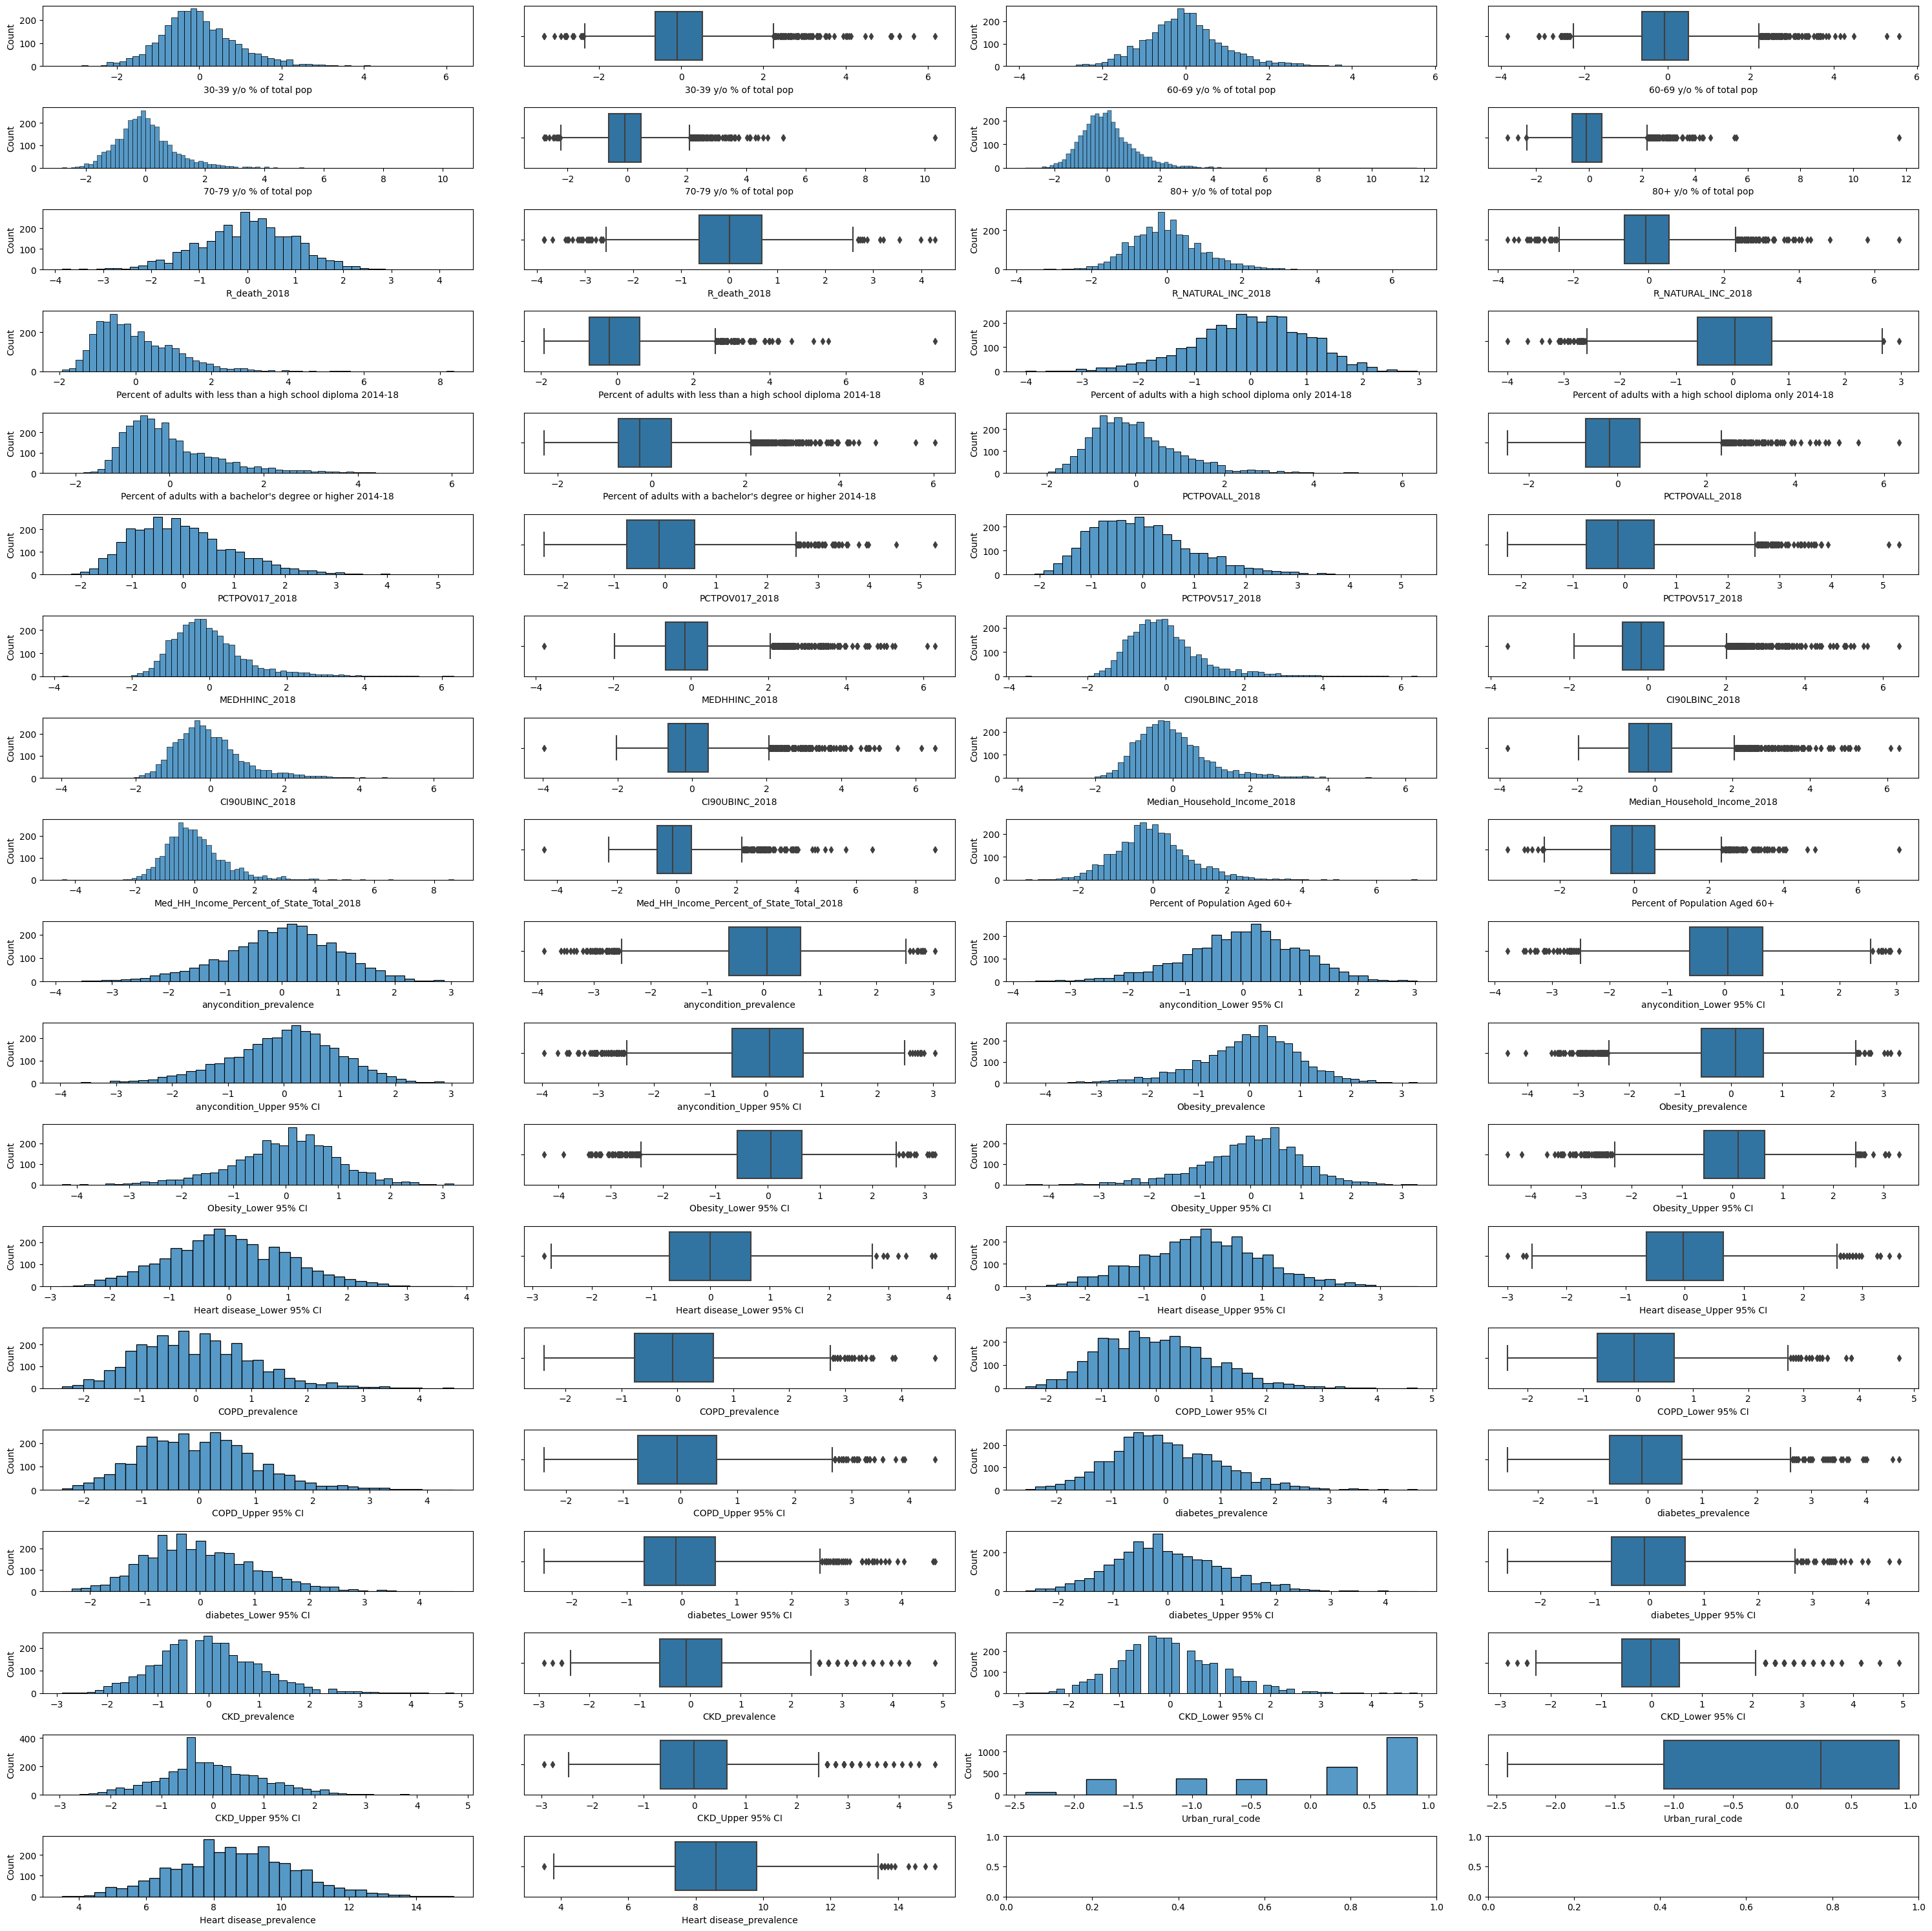

In [17]:
# List of column names from your dataset
column_names = data_combo.columns

# Determine the number of rows and columns for the subplots
num_rows = 19
num_cols = 4

# Create the subplots with custom height ratios
fig, axis = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# Flatten the axis array to make it easier to iterate through the subplots
axis = axis.flatten()

# Iterate through each column and plot histograms and box plots
for i, col_name in enumerate(column_names):
    sns.histplot(ax=axis[i * 2], data=data_combo, x=col_name)
    sns.boxplot(ax=axis[i * 2 + 1], data=data_combo, x=col_name)

    # If you want to remove the y-axis labels on the box plots, you can add this line:
    axis[i * 2 + 1].set(ylabel=None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### Multivariate Data Analysis

##### Numerical Data Analysis

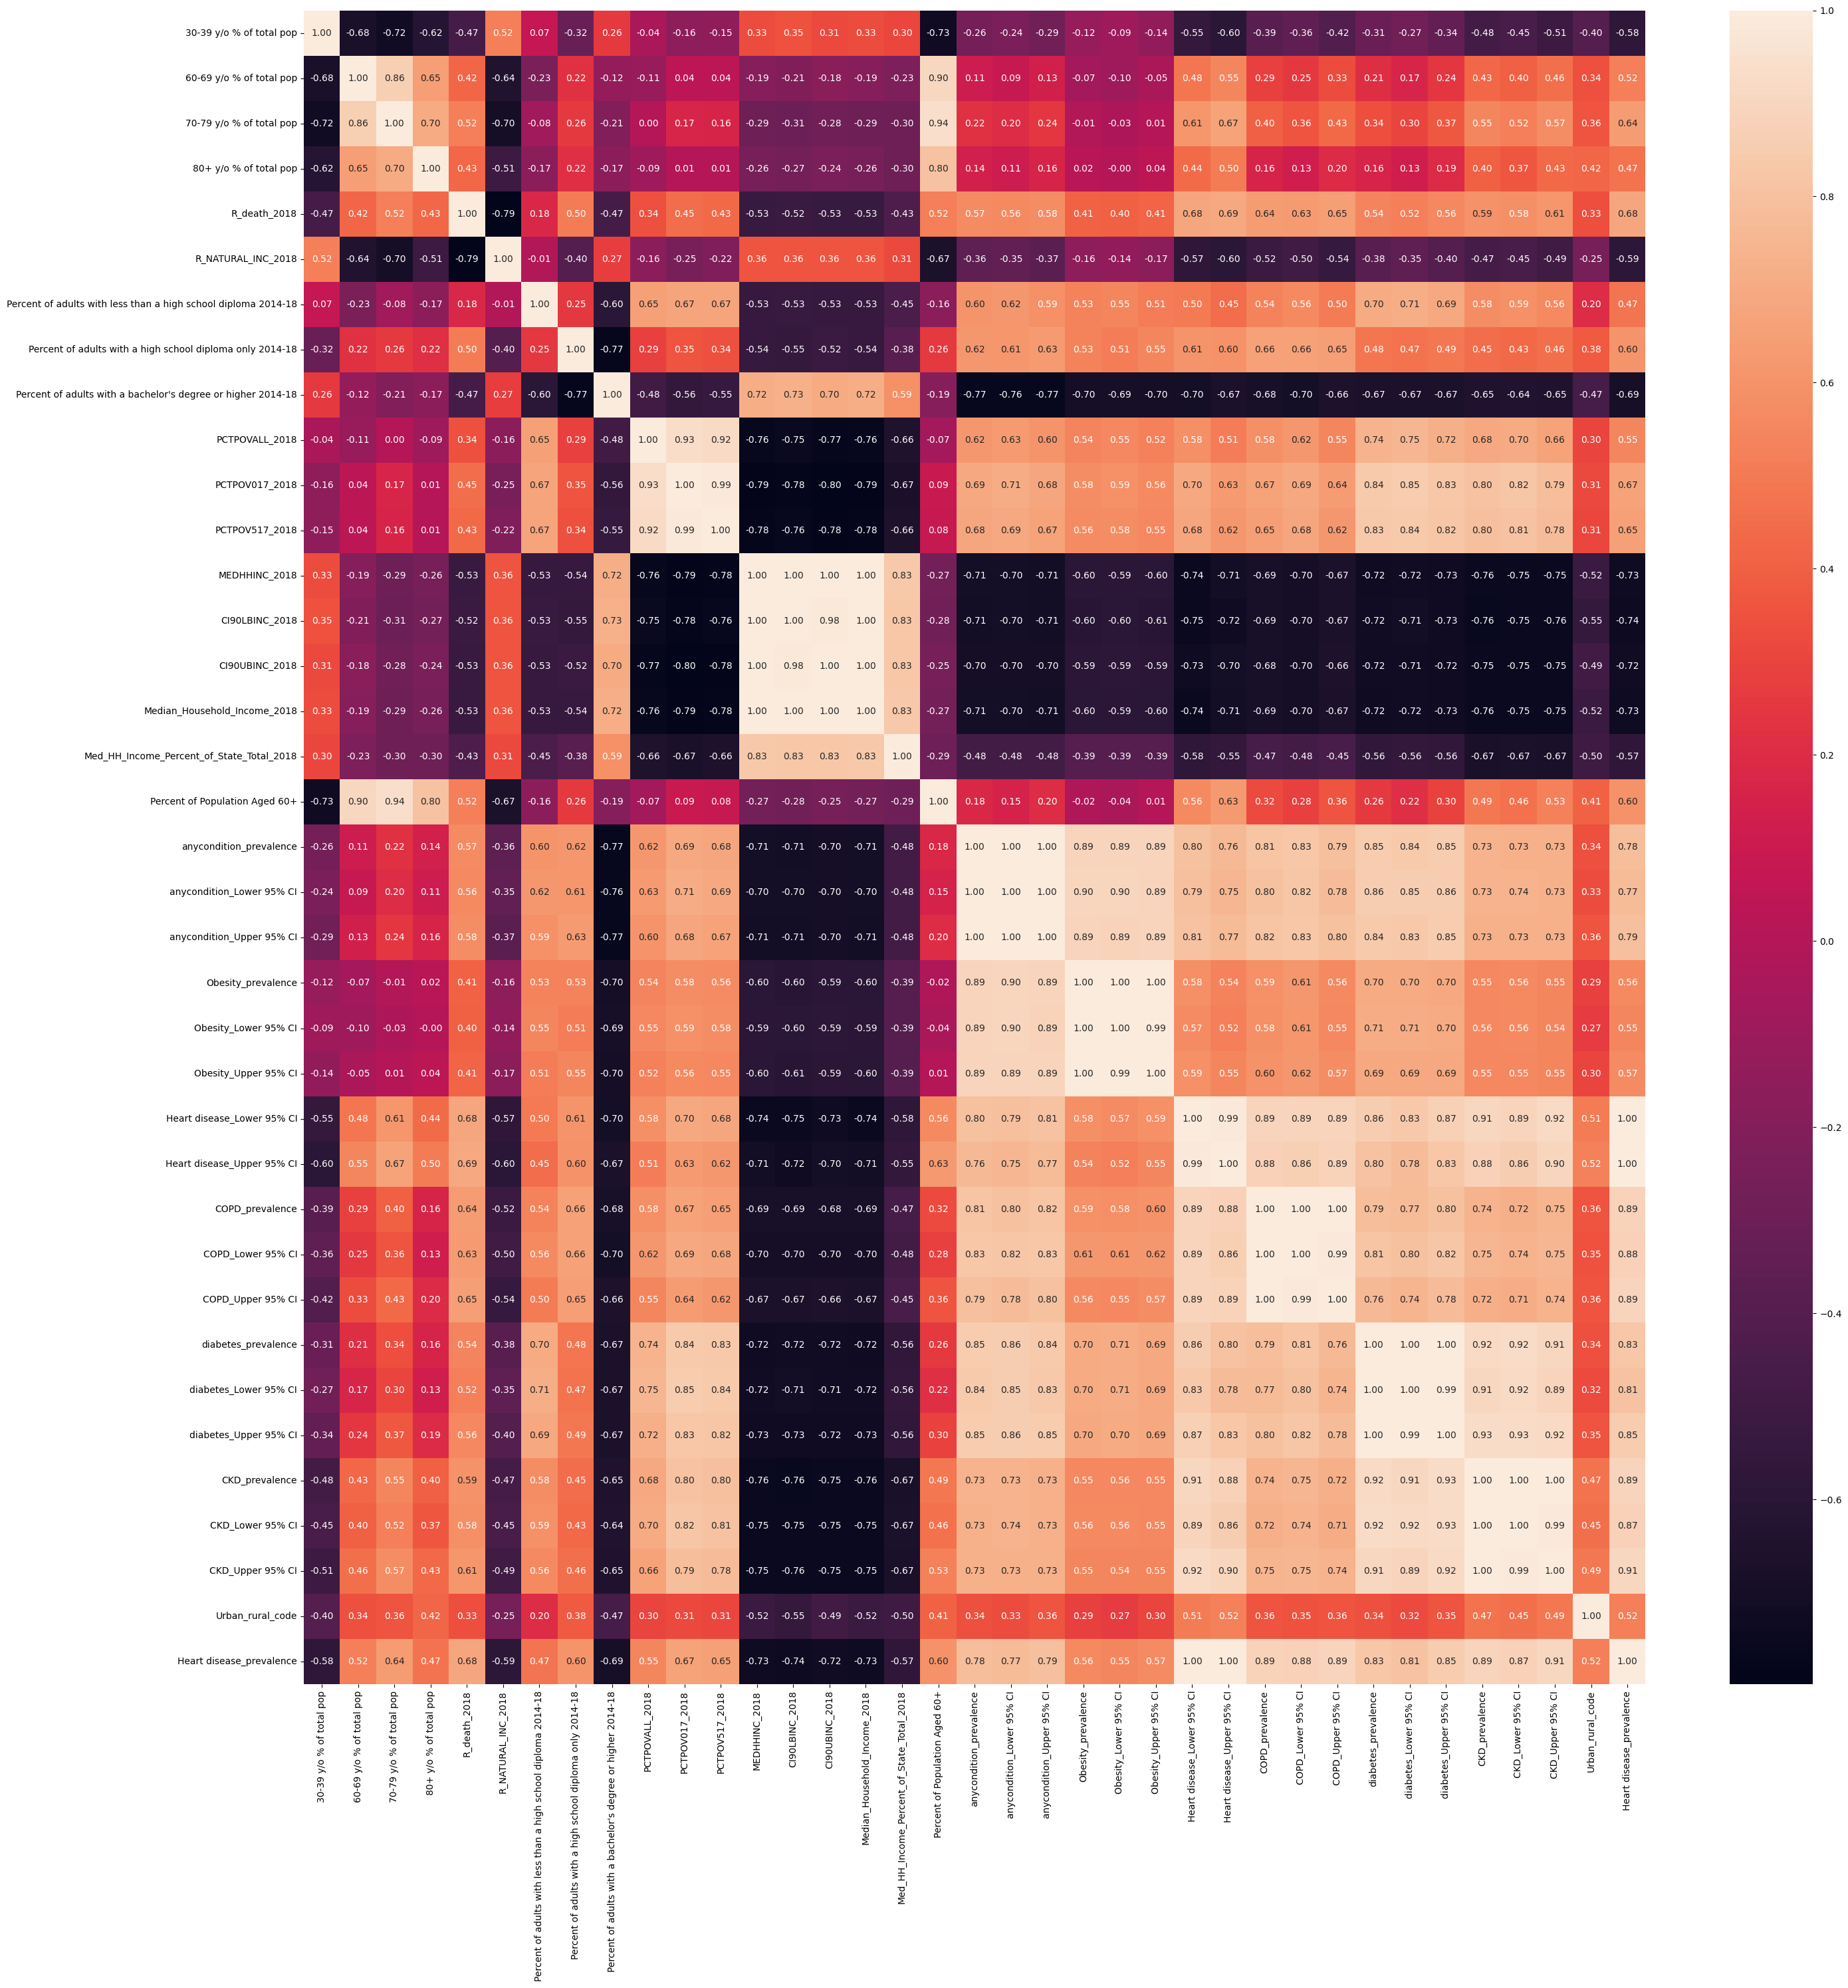

In [14]:
# Categorical Univariate Date Analysis

# Draw Canvas
fig, axis = plt.subplots(figsize=(30,30))

# Plot the Data
sns.heatmap(data_combo.corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

#### Feature Engineering

In [15]:
# Dataset Data Describe

data_combo.describe()

,30-39 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,R_death_2018,R_NATURAL_INC_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,...,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code,Heart disease_prevalence
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,...,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000
mean,-1.154066e-15,-6.112591e-16,3.003967e-16,-2.110131e-16,-1.940415e-16,-1.357725e-17,-7.693775e-17,1.233267e-16,-1.504812e-16,2.783336e-16,...,-4.073175e-17,-5.657187e-16,-6.551023e-16,1.866872e-16,1.787671e-16,-5.826903e-16,-6.347364e-16,-8.406580e-16,2.743736e-16,8.607803
std,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,...,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.758587
min,-3.335878e+00,-3.845758e+00,-2.799574e+00,-3.084344e+00,-3.857404e+00,-3.748025e+00,-1.926874e+00,-4.002468e+00,-2.287028e+00,-2.472633e+00,...,-2.363847e+00,-2.387051e+00,-2.560101e+00,-2.512111e+00,-2.603662e+00,-2.898476e+00,-2.857003e+00,-2.953608e+00,-2.407187e+00,3.500000
25%,-6.261832e-01,-6.164830e-01,-6.173257e-01,-6.483993e-01,-6.197304e-01,-6.415651e-01,-7.275375e-01,-6.237043e-01,-6.968354e-01,-7.110637e-01,...,-7.352910e-01,-7.417502e-01,-6.877974e-01,-6.818182e-01,-6.917368e-01,-6.096153e-01,-5.827958e-01,-6.696521e-01,-1.082865e+00,7.400000
50%,-1.006136e-01,-6.667029e-02,-8.634665e-02,-1.097636e-01,1.291846e-02,-7.451295e-02,-2.067730e-01,4.370580e-02,-2.462807e-01,-1.728065e-01,...,-6.470902e-02,-5.301959e-02,-1.004080e-01,-1.098516e-01,-8.983434e-02,-8.141661e-02,-1.424397e-02,-1.709330e-02,2.414568e-01,8.600000
75%,5.233915e-01,5.074968e-01,4.725065e-01,4.888912e-01,6.827820e-01,5.418481e-01,5.980449e-01,6.972115e-01,4.269010e-01,5.122483e-01,...,6.537716e-01,6.357110e-01,6.338287e-01,6.146395e-01,6.536922e-01,6.228483e-01,5.543079e-01,6.354655e-01,9.036177e-01,9.800000
max,6.174273e+00,5.564762e+00,1.035355e+01,1.172378e+01,4.292602e+00,6.656150e+00,8.346389e+00,2.963625e+00,6.034981e+00,6.335213e+00,...,4.725162e+00,4.461992e+00,4.598707e+00,4.618406e+00,4.583761e+00,4.848438e+00,4.913206e+00,4.713958e+00,9.036177e-01,15.100000


In [16]:
# Drop Null Data

data_combo.isnull().sum().sort_values(ascending=False)

30-39 y/o % of total pop                                          0
60-69 y/o % of total pop                                          0
70-79 y/o % of total pop                                          0
80+ y/o % of total pop                                            0
R_death_2018                                                      0
R_NATURAL_INC_2018                                                0
Percent of adults with less than a high school diploma 2014-18    0
Percent of adults with a high school diploma only 2014-18         0
Percent of adults with a bachelor's degree or higher 2014-18      0
PCTPOVALL_2018                                                    0
PCTPOV017_2018                                                    0
PCTPOV517_2018                                                    0
MEDHHINC_2018                                                     0
CI90LBINC_2018                                                    0
CI90UBINC_2018                                  

There's no Null Data

#### Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

